<center>
    Taller 03: Ley de Zipf y Recuperación de Información  <br>
    Prof. Iván Carrera  <br>
    30 de mayo de 2024 <br>
</center>

# Integrantes:
- Jefferson Cando
- Alejandro Moya
- Nicolas Baquero

# 1. Introducción
La ley de Zipf es un fenómeno estadístico que se observa en diversas áreas, incluyendo la lingüística, la economía y las ciencias sociales. Formulada por el lingüista estadounidense George Zipf en la década de 1930, esta ley establece que, en un corpus de texto suficientemente grande, la frecuencia de cualquier palabra es inversamente proporcional a su posición en una lista ordenada de las palabras por frecuencia. Matemáticamente, se puede expresar como:

$$
f(r) \approx \frac{C}{r^s}
$$

Donde:

- f(r)  es la frecuencia de la palabra en la posición \( r \).
- r  es la posición de la palabra cuando todas las palabras están ordenadas por frecuencia.
- C  es una constante.
- s  es un parámetro que en muchos casos es aproximadamente 1.

En este ejercicio, exploraremos la ley de Zipf y su impacto en la Recuperación de Información a través de la recopilación y análisis manual de datos.

# 2. Objetivo
Entender la ley de Zipf y su efecto en la Recuperación de Información mediante la recopilación y análisis manual de datos.

# 3. Materiales
- Corpus de texto (disponible en el aula virtual).
- Papel y lápiz, o una hoja de cálculo.
- Calculadora

# 4. Pasos a Seguir

## 4.1. Recopilación de Datos
- Cada grupo debe leer el texto y contar la frecuencia de cada palabra.  
- Crear una lista con todas las palabras y sus respectivas frecuencias.


In [2]:
import pandas as pd
from collections import Counter
import re

path_txt = "data/elniñoquesobrevivio.txt"
with open(path_txt, 'r', encoding='utf-8') as file:
    contenido = file.read()


contenido = contenido.lower()
contenido = re.sub(r'[^\w\s]', '', contenido)

palabras = contenido.split()


frecuencia_palabras = Counter(palabras)

df_frecuencia = pd.DataFrame(frecuencia_palabras.items(), columns=['Palabra', 'Frecuencia'])

df_frecuencia

,Palabra,Frecuencia
0,el,53
1,niño,6
2,que,70
3,vivió,1
4,señor,24
...,...,...
661,tu,1
662,esperado,1
663,pareció,1
664,molesta,1


## 4.2. Ordenación de las Palabras
 - Ordenar las palabras por frecuencia, de mayor a menor.
 - Asignar un rango a cada palabra basado en su posici´on en la lista ordenada (1 para la
 palabra más frecuente, 2 para la siguiente, etc.).

In [3]:
df_frecuencia_ordenada = df_frecuencia.sort_values(by='Frecuencia', ascending=False).reset_index(drop=True)
df_frecuencia_ordenada.index = df_frecuencia_ordenada.index + 1

In [4]:
df_frecuencia_ordenada

,Palabra,Frecuencia
1,de,75
2,que,70
3,la,64
4,el,53
5,y,46
...,...,...
662,llevaban,1
663,conjuntos,1
664,ah,1
665,ridícula,1


In [6]:
df_frecuencia_ordenada.to_csv("outputs/lista_palabras_frecuencia_ordenada.csv",index=True)

## 4.3. Análisis de la Ley de Zipf
 - Graficar las frecuencias (eje Y) contra los rangos (eje X) en una escala lineal.
 - Graficar las frecuencias (eje Y) contra los rangos (eje X) en una escala logarítmica.
 - Analizar si las gráficas siguen una línea recta, lo cual confirmaría la ley de Zipf.

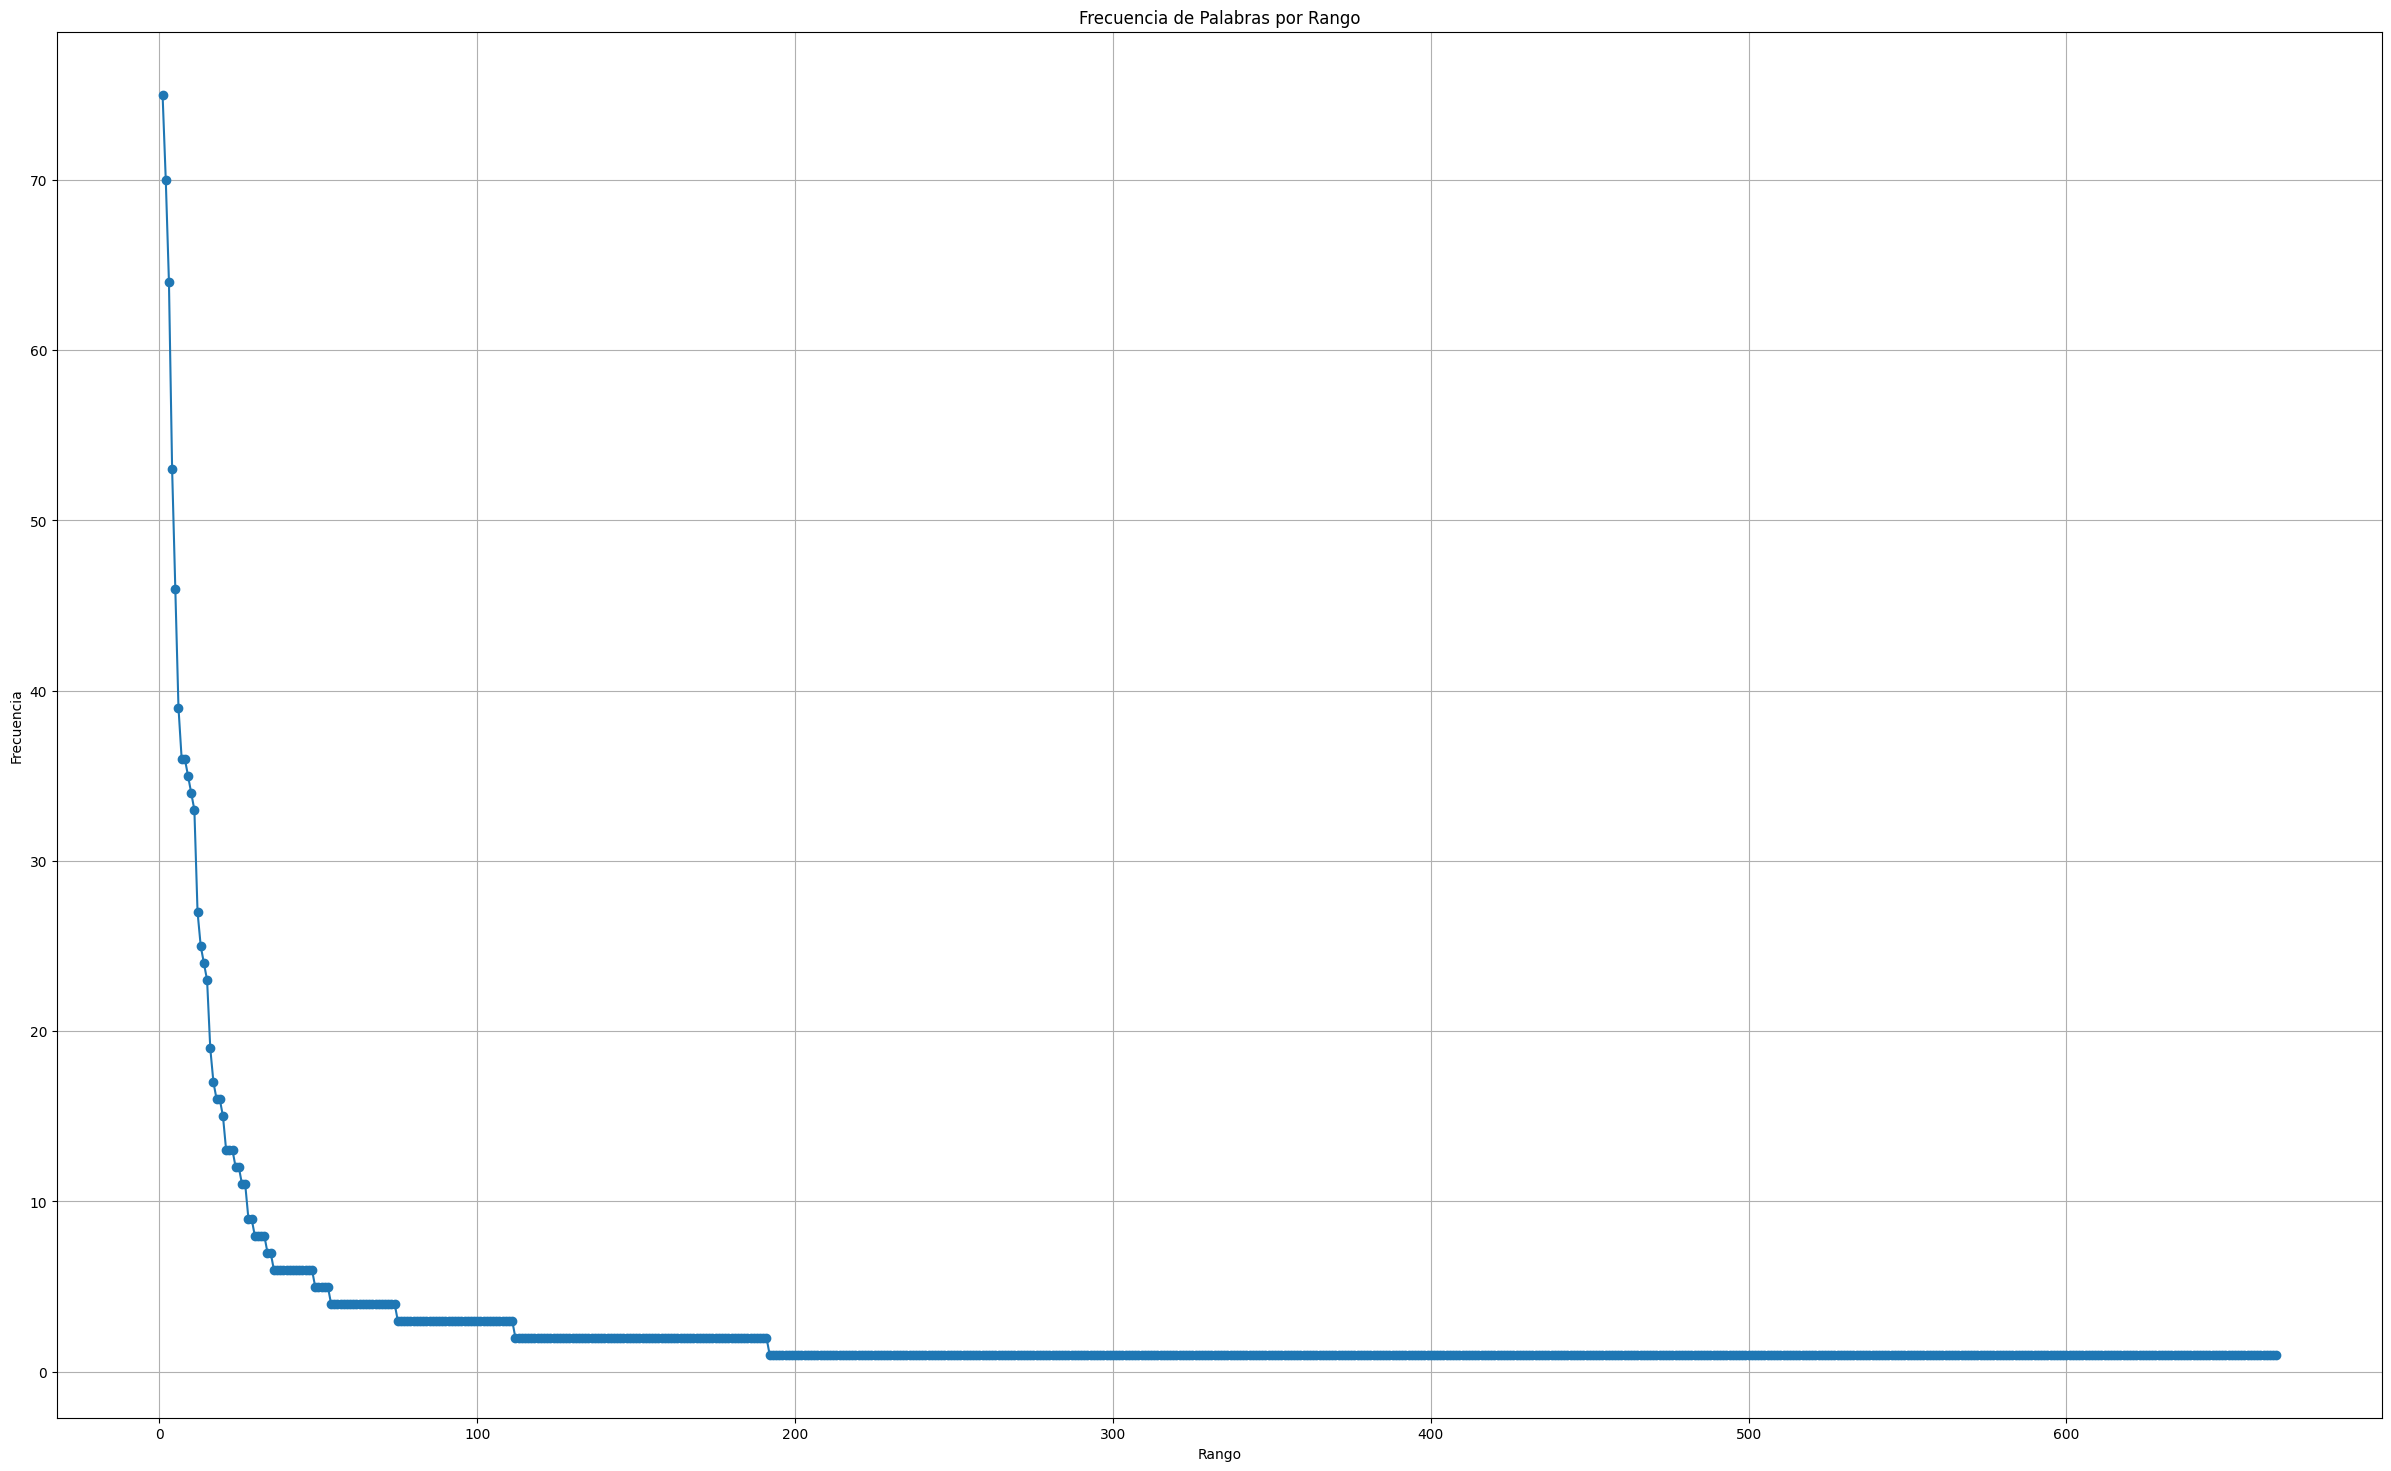

In [8]:
import matplotlib.pyplot as plt
# Graficar las frecuencias contra los rangos en una escala lineal
plt.figure(figsize=(30, 18))
plt.plot(df_frecuencia_ordenada.index, df_frecuencia_ordenada['Frecuencia'], marker='o')
plt.title('Frecuencia de Palabras por Rango')
plt.xlabel('Rango')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

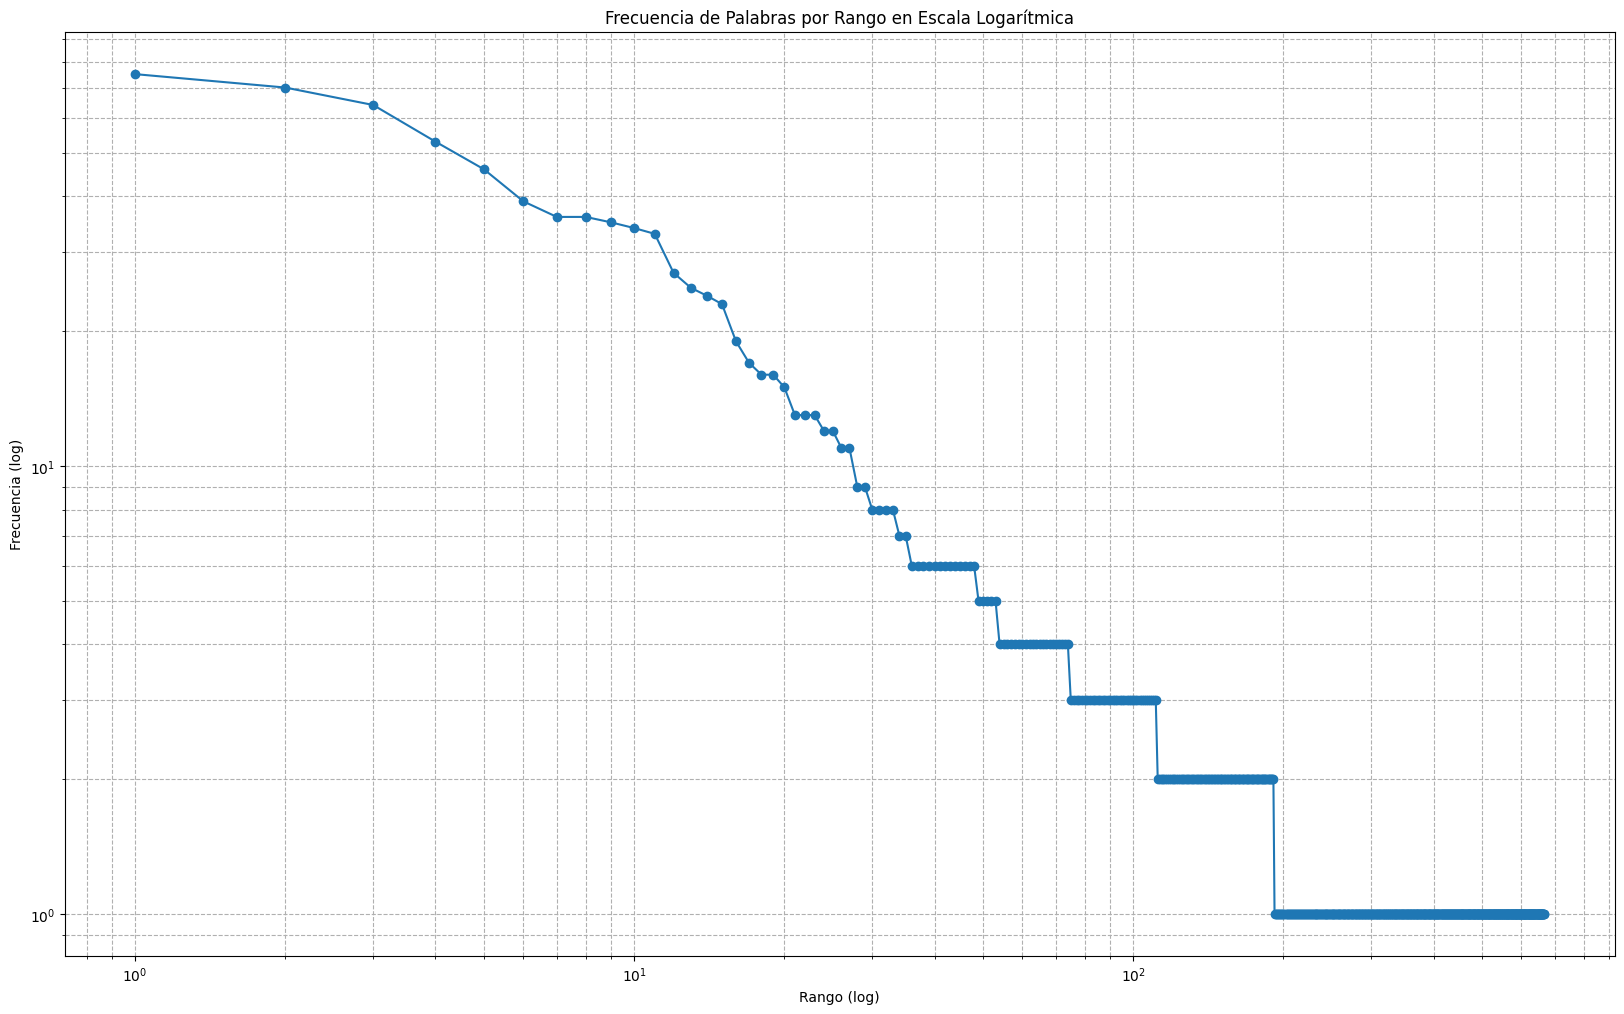

In [10]:
# Graficar las frecuencias contra los rangos en una escala logarítmica
plt.figure(figsize=(20, 12))
plt.plot(df_frecuencia_ordenada.index, df_frecuencia_ordenada['Frecuencia'], marker='o')
plt.xscale('log')
plt.yscale('log')
plt.title('Frecuencia de Palabras por Rango en Escala Logarítmica')
plt.xlabel('Rango (log)')
plt.ylabel('Frecuencia (log)')
plt.grid(True, which="both", ls="--")
plt.show()


## 4.4. Discusión
- Reflexionar sobre cómo la frecuencia de las palabras afecta la indexación y la búsqueda
de información.
- Preguntas:
> - ¿Cómo afecta la alta frecuencia de palabras comunes (como stopwords) en la
eficiencia de un sistema de búsqueda? <br>
 > La alta frecuencia de palabras comunes, o stopwords, afecta la eficiencia de un sistema de búsqueda al introducir ruido en los resultados, aumentar el tamaño del índice y reducir la velocidad del procesamiento. Estas palabras no aportan valor semántico y su inclusión puede llevar a obtener resultados menos relevantes.  <br>
> - ¿Qué técnicas se pueden utilizar para manejar palabras extremadamente frecuentes y palabras raras en sistemas de Recuperación de Información? <br>
 > Las palabras extremadamente frecuentes se manejan mediante el filtrado de stopwords, el uso de TF-IDF para ponderar su importancia. Para las palabras raras, se emplean técnicas como stemming y lematización, expansión de consultas con sinónimos y considerar la frecuencia en documentos en lugar de términos  <br>
> - ¿Cómo se pueden usar estos hallazgos para mejorar la precisión y el recall de un
motor de búsqueda? <br>
 > Para mejorar los indicadores de éxito de un motor de búsqueda se puede aplicar las técnicas detalladas en las respuestas anteriores. Esto implica el uso de técnicas como el filtrado de stopwords, TF-IDF, stemming, lematización, expansión de consultas, modelos distribucionales y ponderación de palabras. Al combinar estas técnicas y ajustar dinámicamente la relevancia de términos basándose en el feedback de los usuarios, el motor de búsqueda puede ofrecer resultados más precisos y completos, identificando documentos relevantes mientras minimiza el ruido en los resultados. 

# 5. Entrega
- Cada grupo presenta los resultados del análisis de la Ley de Zipf.
- Resumir las implicaciones de la ley de Zipf en la Recuperación de Información y cómo
esta ley puede influir en el diseño de sistemas de búsqueda y procesamiento de textos.

Observamos que la gráfica en escala lineal muestra una disminución rápida de la frecuencia conforme el rango aumenta, lo que se alinea con la expectativa de que pocas palabras son muy frecuentes mientras que muchas palabras son poco frecuentes. 

La gráfica en escala logarítmica mostró una tendencia aproximada a una línea recta descendente, confirmando la ley de Zipf en nuestro corpus. 


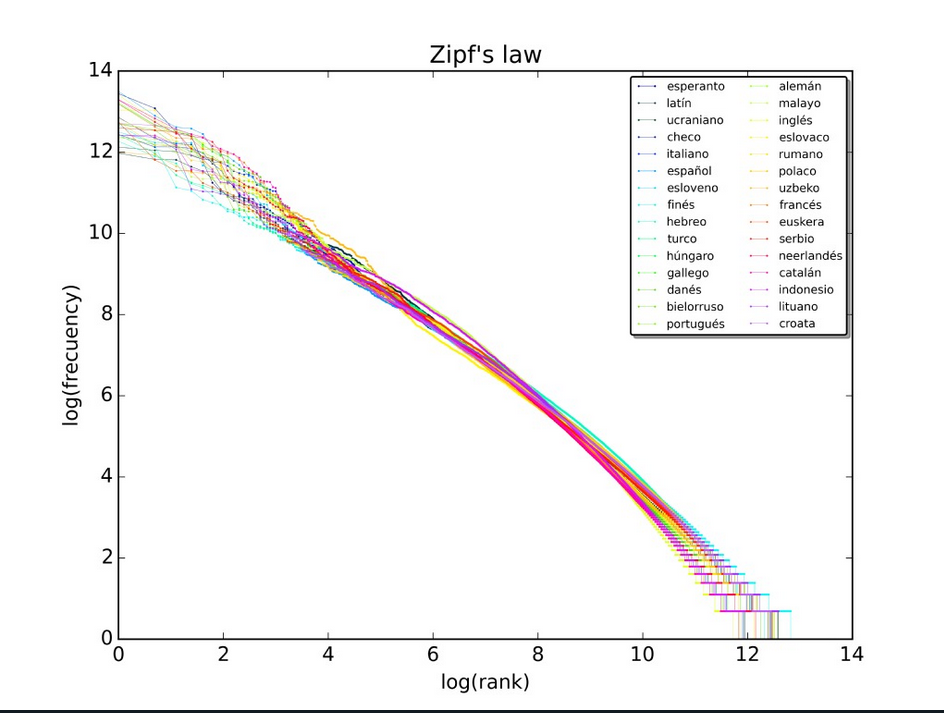




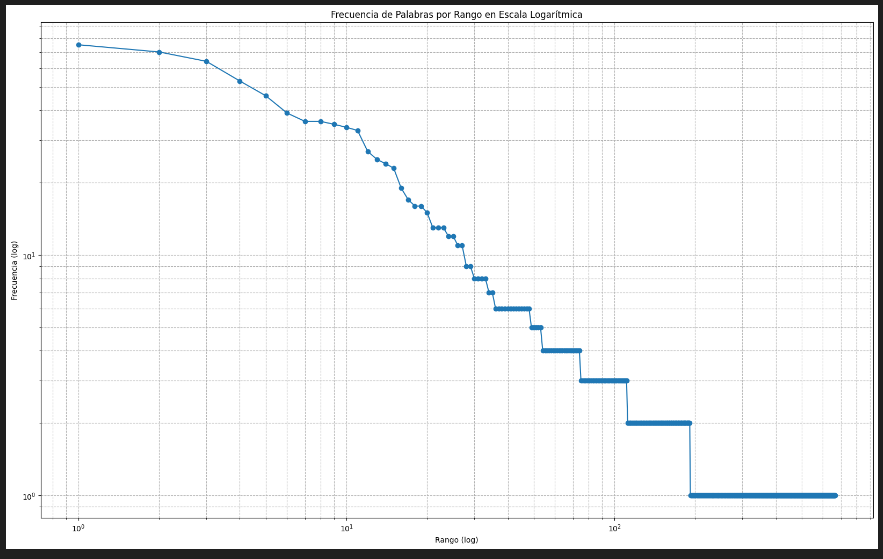


 
Las implicaciones de la Ley de Zipf en la Recuperación de Información y el diseño de sistemas de búsqueda y procesamiento de textos son significativas:

- **Relevancia de las palabras clave:** La Ley de Zipf resalta la importancia de identificar y priorizar las palabras clave en un texto. Las palabras más frecuentes son cruciales para comprender el contenido y deben ser consideradas en la indexación y búsqueda de documentos.

- **Optimización de la búsqueda:** Al comprender la distribución zipfiana de las palabras, los sistemas de búsqueda pueden optimizarse para recuperar resultados relevantes de manera más eficiente. Esto puede implicar técnicas como la ponderación de términos o la expansión de consultas para tener en cuenta sinónimos y términos relacionados.

- **Diseño de algoritmos de compresión:** La distribución zipfiana también influye en el diseño de algoritmos de compresión de datos. La compresión de datos basada en la frecuencia de palabras puede beneficiarse de la compresión diferencial, priorizando las palabras más frecuentes para una representación más eficiente del texto.

- **Mejora de la relevancia de la búsqueda:** Entender la distribución de las palabras puede ayudar a mejorar la relevancia de los resultados de búsqueda al ponderar adecuadamente la importancia de las palabras en el contexto de la consulta.
